# Importing All necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [3]:
Train_data=pd.read_excel('Data_Train.xlsx')
Train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
Test_data=pd.read_excel('Test_set.xlsx')
Test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# Shape

In [5]:
print("Train_data: ",Train_data.shape)
print('\n')
print("Testing_data : ",Test_data.shape)

Train_data:  (10683, 11)


Testing_data :  (2671, 10)


# Train_data

### shape

In [6]:
Train_data.shape

(10683, 11)

### column

In [7]:
Train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### Null values

In [8]:
Train_data.isnull().values.any()

True

### Null vales in columns

In [9]:
Train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Missing values via visualization

<AxesSubplot:>

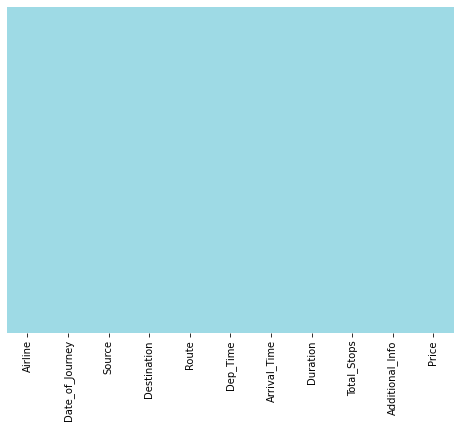

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(Train_data.isnull(),yticklabels=False,cbar=False,cmap='tab20_r')

Observations: 
    
    Only one value is null in Route and Total_Stops column. So, instead of filling them we can drop it.

### Dropping the null values

In [11]:
Train_data.dropna(inplace=True)

### Again check fot null values

In [12]:
Train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### shape

In [13]:
Train_data.shape

(10682, 11)

### Informations

In [14]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


# Summary statistics

In [15]:
Train_data.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Observations : 
    
    Summary statistics always gives us the information about the numerical columns. 
    
    1. Te minimum price of flight is 1759.000000 rupees and maximum is 79512 rupees.
    
    2. Mean is greater than median thats why price column is right skewed.

# Exploratory Data Analysis

### checking the man price

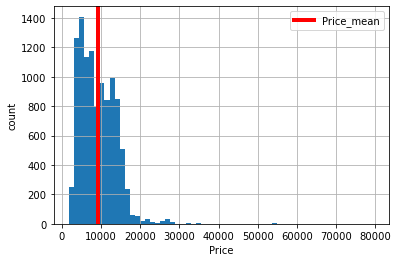

In [16]:
loan_amount=Train_data['Price'].hist(bins=60)
mean_val=np.mean(Train_data['Price'])
plt.axvline(mean_val,linewidth=4,color='red',label='Price_mean')
plt.xlabel('Price')
plt.ylabel('count')
plt.legend()
plt.show()

### From description we can see that Date_of_Journey is a object type, therefore we have to convert this data type into timestamp so we use this column for proper prediction.

### Check the unique value in Date_of_Journey column

In [17]:
Train_data['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

### Here from date of journey all the data are from year 2019. So we can not create seprate column for year

### Making the new column journey date

### First need to convert from object to datetime

In [18]:
Train_data['Date_of_Journey']=pd.to_datetime(Train_data['Date_of_Journey'])
Train_data['Date_of_Journey']

0       2019-03-24
1       2019-01-05
2       2019-09-06
3       2019-12-05
4       2019-01-03
           ...    
10678   2019-09-04
10679   2019-04-27
10680   2019-04-27
10681   2019-01-03
10682   2019-09-05
Name: Date_of_Journey, Length: 10682, dtype: datetime64[ns]

In [19]:
Train_data['Journey_date']=Train_data['Date_of_Journey'].dt.day

### Making the new column journey Month

In [20]:
Train_data['Journey_month']=Train_data['Date_of_Journey'].dt.month

### check the dataset

In [21]:
Train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


### Now we are going to drop Date_of_journey because we have converted this column into integers and as it is of no use

In [22]:
Train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

#### 1. Now we convert Departure  time.

2. Departure time is the time when a plane leaves the source airport

3.Similarly we can extract the values from Dep_Time as we fetch the values from Date_of_journey




### Fetching hours

In [23]:
Train_data['Dep_Time']=pd.to_datetime(Train_data['Dep_Time'])
Train_data['Dep_hour']=Train_data['Dep_Time'].dt.hour

### Fetching minutes

In [24]:
Train_data['Dep_min']=Train_data['Dep_Time'].dt.minute

### Drop the Dep_Time column as there is no use

In [25]:
Train_data.drop(['Dep_Time'],axis=1,inplace=True)

### check the dataset

In [26]:
Train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


### Arrival_Time

In [27]:
Train_data['Arrival_Time']=pd.to_datetime(Train_data['Arrival_Time']) #Convert from object type to datetime
Train_data['Arr_hour']=Train_data['Arrival_Time'].dt.hour #Convert to hour
Train_data['Arr_min']=Train_data['Arrival_Time'].dt.minute #Convert to minute
Train_data.drop(['Arrival_Time'],axis=1,inplace=True)  #Drop the column
Train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


# Now we convert duration

### Assigning and converting duration column into list 

In [28]:
duration=list(Train_data["Duration"])

In [29]:
for i in range(len(duration)):
    if len(duration[i].split())!=0:  #Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"  #Adds 0 minute
        else:
            duration[i]="0h " + duration[i]
            
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0])) #Extract hours from duration
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))
    

### Adding duration hours and duration minute list to Train_data

In [30]:
Train_data['Duration_hours']=duration_hours
Train_data['Duration_mins']=duration_mins

### Check data set

In [31]:
Train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


### Dropping Duration column as it has no use

In [32]:
Train_data.drop(['Duration'],axis=1,inplace=True)

In [33]:
Train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


### Airline vs Price

In [34]:
print(Train_data['Airline'].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


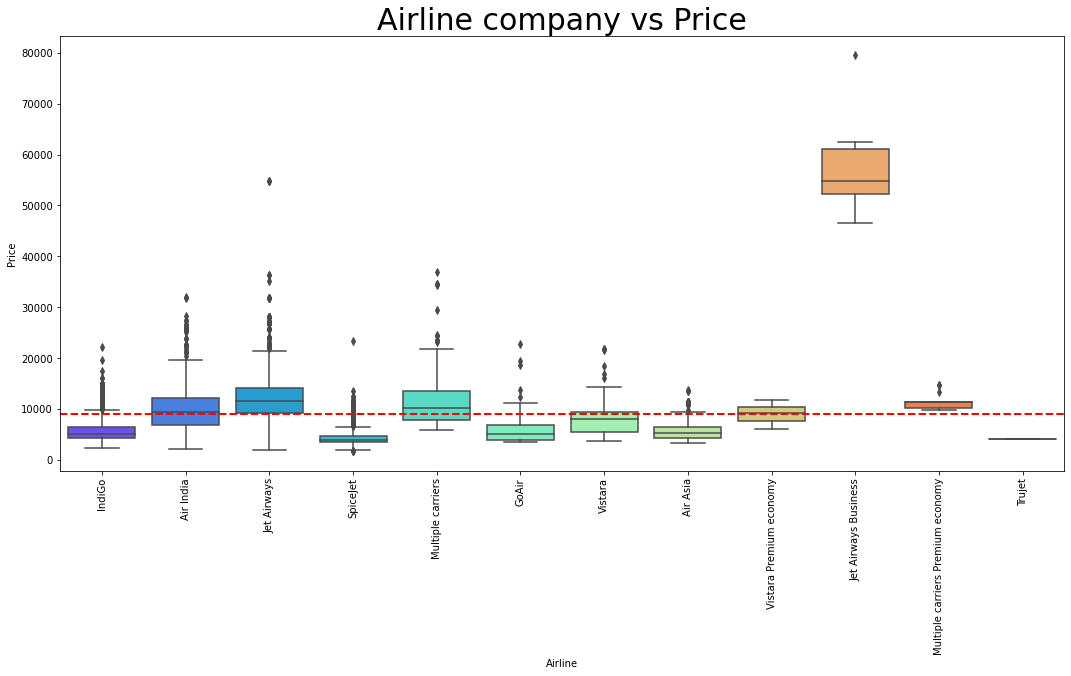

In [35]:
plt.figure(figsize=(18,8))
mean_price=np.mean(Train_data['Price'])
sns.boxplot(y="Price",x="Airline",data=Train_data,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("Airline company vs Price",fontsize=30)
plt.xticks(rotation="vertical")
plt.show()

Observations : 
    
    For the jet airlines it's very high than others. Because it's business class airline.

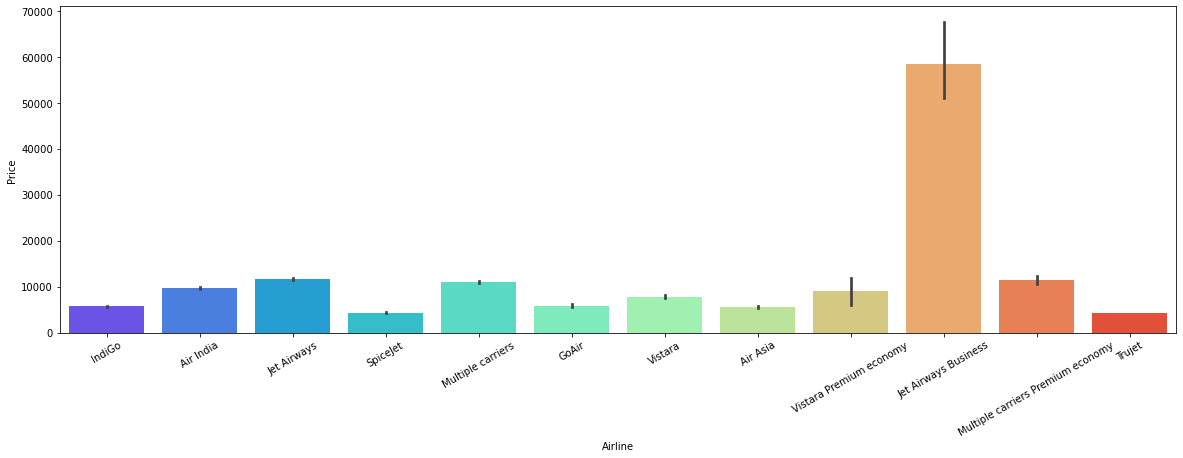

In [36]:
plt.figure(figsize=(20,6))
sns.barplot(x='Airline',y='Price',data=Train_data,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

Observation: 
    
    barplot is used to know the frequency
    
    From above graph we can see that Jet Airways Business have the highest price. We can also remove it as Jet Airways is closed.
    
    There are also some outliers present in Airways price which needs to be removed.

### Source vs Price

In [37]:
print(Train_data['Source'].value_counts())

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


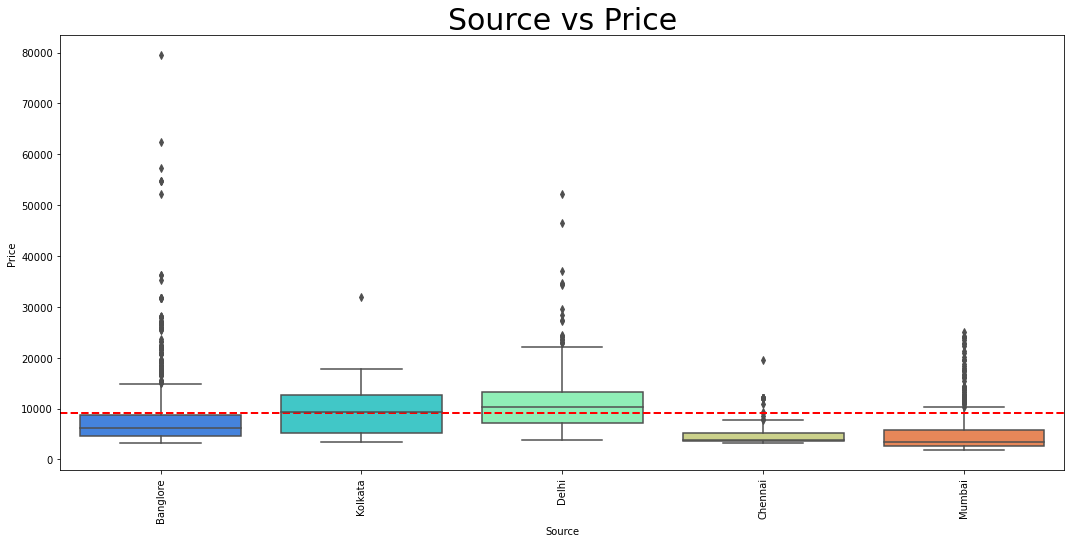

In [38]:
plt.figure(figsize=(18,8))
mean_price=np.mean(Train_data['Price'])
sns.boxplot(y="Price",x="Source",data=Train_data,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("Source vs Price",fontsize=30)
plt.xticks(rotation="vertical")
plt.show()

Observations : 
    
    Outliers are present here

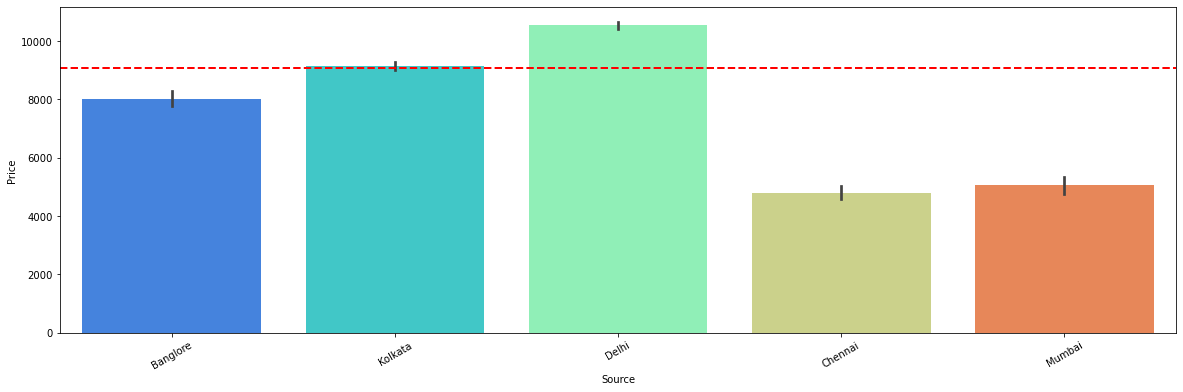

In [39]:
plt.figure(figsize=(20,6))
sns.barplot(x='Source',y='Price',data=Train_data,palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.xticks(rotation=30)
plt.show()

Observations: 
    
    From Delhi of Flight is very high
    
    But from Banglore some tickets price is too high which may be outliers.

### Destination vs Price

In [40]:
print(Train_data['Destination'].value_counts())

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


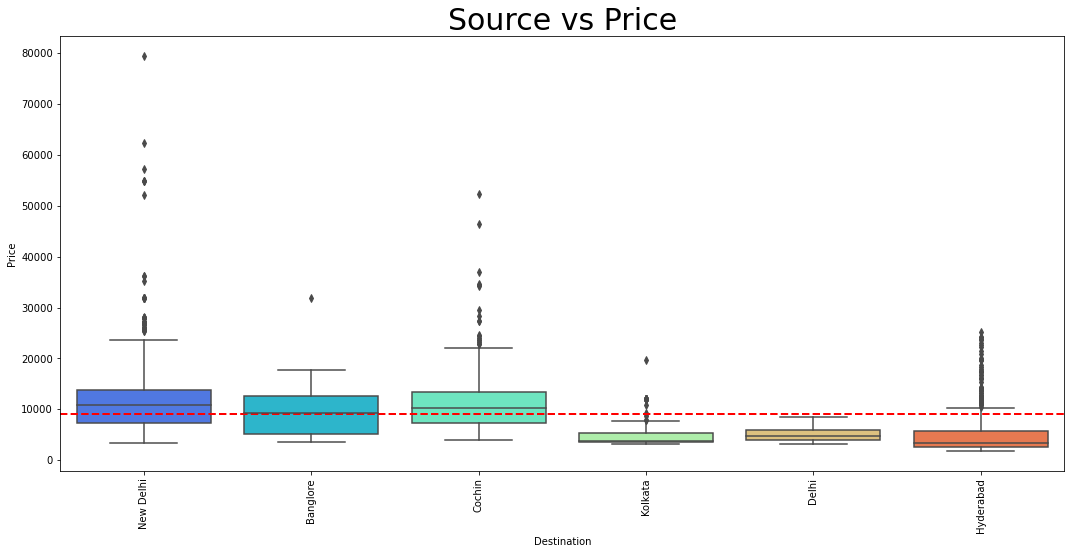

In [41]:
plt.figure(figsize=(18,8))
mean_price=np.mean(Train_data['Price'])
sns.boxplot(y="Price",x="Destination",data=Train_data,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("Source vs Price",fontsize=30)
plt.xticks(rotation="vertical")
plt.show()

Observations : 
    
    1. Here in Banglore, New Delhi, Cochin has outliers. But Bangalore has less comparing to others. 
    
    2. The mean price of 'Kolkata','Delhi' and 'Hyderabad' are below the mean price

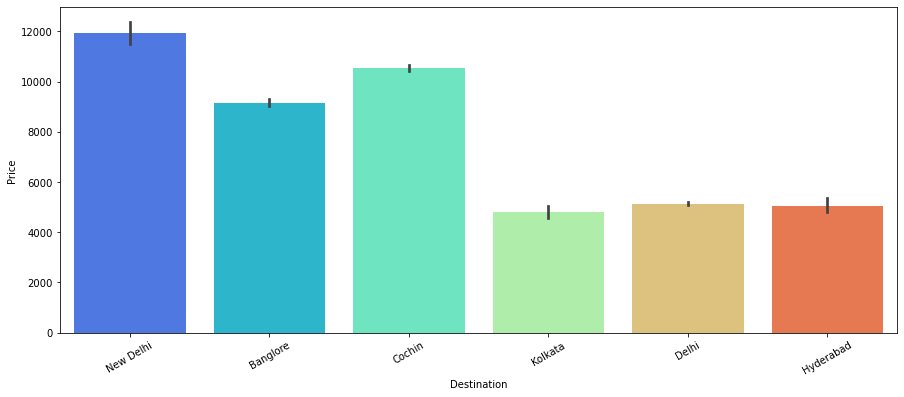

In [42]:
plt.figure(figsize=(15,6))
sns.barplot(x='Destination',y='Price',data=Train_data,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

Observations : 
    
    The maximum price is from New Delhi

### Total_Stops vs Price

In [43]:
print(Train_data['Total_Stops'].value_counts())

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


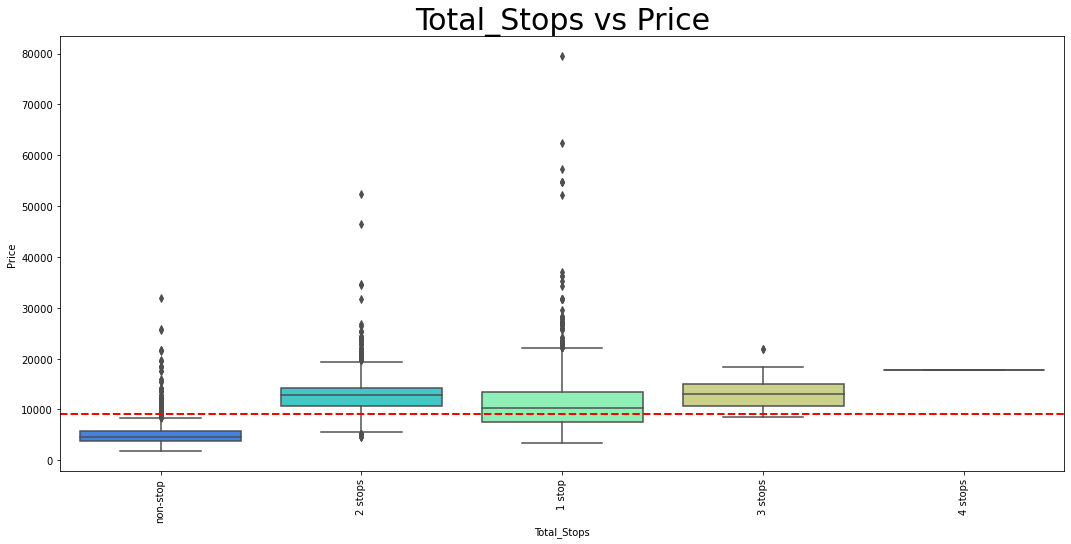

In [44]:
plt.figure(figsize=(18,8))
mean_price=np.mean(Train_data['Price'])
sns.boxplot(y="Price",x="Total_Stops",data=Train_data,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("Total_Stops vs Price",fontsize=30)
plt.xticks(rotation="vertical")
plt.show()

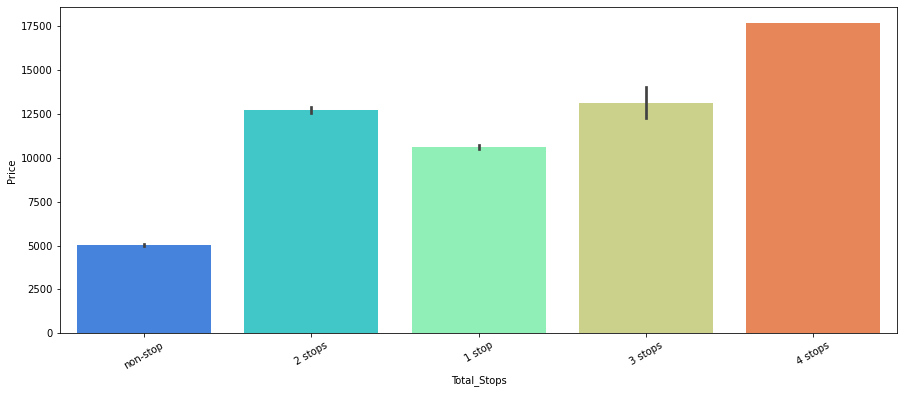

In [45]:
plt.figure(figsize=(15,6))
sns.barplot(x='Total_Stops',y='Price',data=Train_data,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

Observations : 
    
    It is clearly seen that stops does not affect the price of the flight.
    
    Flights which have four stops have higher price

# Handling catagorical Data

### Using OneHotEncoding to convert the Airline, Source, Destination column because it is nominal Catagorical data.

# For Nominal catagory we will use get_dummi

### Converting Airline column

In [46]:
Airline=Train_data['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


### Converting Source column

In [47]:
Source=Train_data['Source']
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


### Converting Destination column

In [48]:
Destination=Train_data['Destination']
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


### We can drop some columns

In [49]:
Train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

### We have to convert Total_Stop

In [50]:
Train_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
Train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45


### Adding out Airline,Source,Destination column into Train data set

In [51]:
train=pd.concat([Train_data,Airline,Source,Destination],axis=1)

In [52]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,...,0,0,0,0,0,0,0,0,0,1


### Dropping some columns that is Airline, Source, Destination

In [53]:
train.drop(['Airline','Source','Destination'],axis=1,inplace=True)
train.head()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [54]:
train.shape

(10682, 30)

### Now all the columns change into Numeric data type now.same seps are followed in test data

# Test Data

In [55]:
Test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### Now copy the same steps for test data in one cell

(2671, 10)
*************************************************************************************


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')
*************************************************************************************


False
*************************************************************************************


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
*************************************************************************************


AxesSubplot(0.125,0.125;0.775x0.755)
*************************************************************************************


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route            

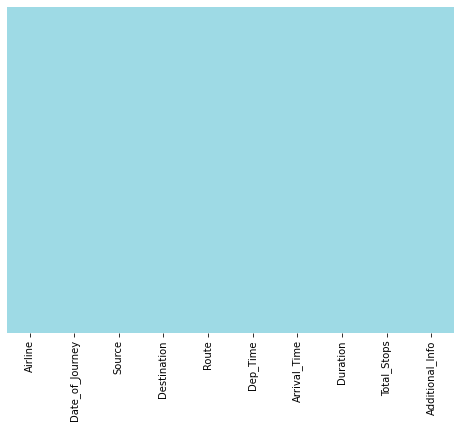

In [56]:
print(Test_data.shape)
print("*"*85)
print("\n")
print(Test_data.columns)
print("*"*85)
print("\n")
print(Test_data.isnull().values.any())
print("*"*85)
print("\n")
print(Test_data.isnull().sum())
print("*"*85)
print("\n")

plt.figure(figsize=(8,6))
print(sns.heatmap(Test_data.isnull(),yticklabels=False,cbar=False,cmap='tab20_r'))

Test_data.dropna(inplace=True)
print("*"*85)
print("\n")

print(Test_data.isnull().sum())

print("*"*85)
print("\n")

print(Test_data.shape)

print("*"*85)
print("\n")

print(Test_data.info())

print("*"*85)
print("\n")

print(Test_data.describe())

print("*"*85)
print("\n")


#EDA
#Date_of_Journey
Test_data['Date_of_Journey']=pd.to_datetime(Test_data['Date_of_Journey'])
Test_data['Journey_date']=Test_data['Date_of_Journey'].dt.day
Test_data['Journey_month']=Test_data['Date_of_Journey'].dt.month
Test_data.drop(['Date_of_Journey'],axis=1,inplace=True)


#Dep_Time
Test_data['Dep_Time']=pd.to_datetime(Test_data['Dep_Time'])
Test_data['Dep_hour']=Test_data['Dep_Time'].dt.hour
Test_data['Dep_min']=Test_data['Dep_Time'].dt.minute
Test_data.drop(['Dep_Time'],axis=1,inplace=True)



#Arrival_Time
Test_data['Arrival_Time']=pd.to_datetime(Test_data['Arrival_Time']) #Convert from object type to datetime
Test_data['Arr_hour']=Test_data['Arrival_Time'].dt.hour #Convert to hour
Test_data['Arr_min']=Test_data['Arrival_Time'].dt.minute #Convert to minute
Test_data.drop(['Arrival_Time'],axis=1,inplace=True)  #Drop the column



#Duration
duration=list(Test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!=0:  #Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"  #Adds 0 minute
        else:
            duration[i]="0h " + duration[i]            
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0])) #Extract hours from duration
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))       
Test_data['Duration_hours']=duration_hours
Test_data['Duration_mins']=duration_mins
Test_data.drop(['Duration'],axis=1,inplace=True)
print(Test_data.head())

print("*"*85)
print("\n")


#Catagorical Data
Airline=Test_data['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)
print(Airline.head())


print("*"*85)
print("\n")
Source=Test_data['Source']
Source=pd.get_dummies(Source,drop_first=True)
print(Source.head())


print("*"*85)
print("\n")
Destination=Test_data['Destination']
Destination=pd.get_dummies(Destination,drop_first=True)
print(Destination.head())


print("*"*85)
print("\n")
Test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)
Test_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
print(Test_data.head())


print("*"*85)
print("\n")
test=pd.concat([Test_data,Airline,Source,Destination],axis=1)

print(test.head())


#Drop some columns
test.drop(['Airline','Source','Destination'],axis=1,inplace=True)
print(test.head())


print("*"*85)
print("\n")
print(test.shape)

In [57]:
test.head()

,Total_Stops,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


### Now, all the columns have been changed to Numeric data Type

# Summary Statistics

In [58]:
Train_data.describe()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,0.675229,4611.548810,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


# Correlation

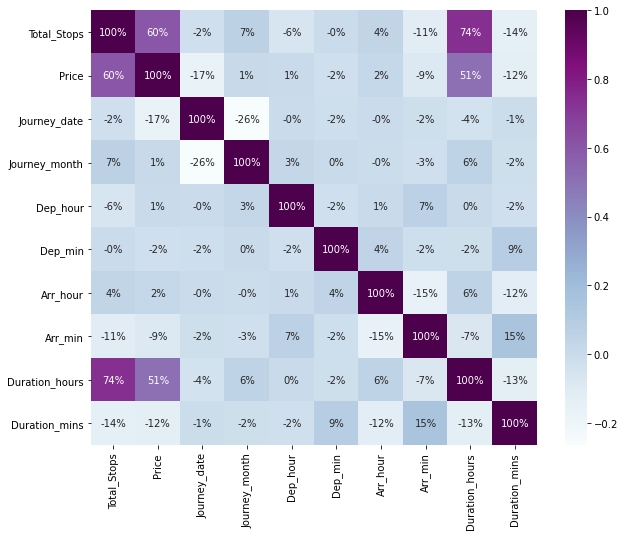

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(Train_data.corr(),annot=True,fmt='.0%',cmap='BuPu')
plt.show()

### Correlation with target column

Text(0.5, 1.0, 'Correlation with Target Variable')

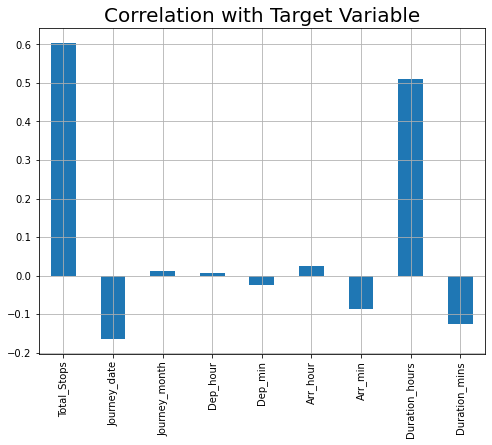

In [60]:
plt.figure(figsize=(8,6))
Train_data.drop('Price',axis=1).corrwith(Train_data['Price']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with Target Variable",fontsize=20)

observations : 
    
    1. Total_stops and Duration_hours are correlated with price.

# removing Outliers

In [61]:
from scipy.stats import zscore
z=np.abs(zscore(train))
threshold=3
print(np.where(z>3))
train_new=train[(z<3).all(axis=1)]
train=train_new
train.shape

(array([    0,     4,     5, ..., 10676, 10680, 10680], dtype=int64), array([29, 29, 17, ..., 17, 19, 29], dtype=int64))


(7506, 30)

# Feature Selection

In [62]:
train.shape

(7506, 30)

In [63]:
train.columns

Index(['Total_Stops', 'Price', 'Journey_date', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

### Splitting the data into input and output variable

In [64]:
x=train.drop(columns=['Price'],axis=1)
x.head()

,Total_Stops,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
1,2,5,1,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,6,9,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,12,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
9,1,27,5,11,25,19,15,7,50,0,...,0,0,1,0,0,1,0,0,0,0
10,1,6,1,9,45,23,0,13,15,1,...,0,0,1,0,0,1,0,0,0,0


In [65]:
y=train['Price']
y.head()

1      7662
2     13882
3      6218
9      8625
10     8907
Name: Price, dtype: int64

### Checking the shape of the input and output variable

In [66]:
print(x.shape,'\t\t', y.shape)

(7506, 29) 		 (7506,)


### Scaling in input variables

In [67]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

### spliting the data into training and testing data

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

### Checking the shape

In [69]:
print(x_train.shape,'\t\t',x_test.shape)

(6004, 29) 		 (1502, 29)


In [70]:
print(y_train.shape,'\t\t',y_test.shape)

(6004,) 		 (1502,)


# Importing all the model Library

In [71]:
# Libraries for data modelling
from sklearn.linear_model import LogisticRegression,Ridge,Lasso,LinearRegression,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR,SVC

#Importinf boosting models
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,ExtraTreesRegressor

#Importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

### All algorithms by using for loop

In [72]:
model=[Lasso(),Ridge(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor(),ExtraTreesRegressor(),LinearRegression(),SVR(),ElasticNet(),RandomForestRegressor()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    print("\033[1m"+ 'R2 score of',m,'is : ' + "\033[0m" )  # Make the line bold
    print(r2_score(y_test,predm))
    print("Training r2_score is :",r2_score(y_train,pred_train)*100)
    print("Testing r2_score is :",r2_score(y_test,pred_test)*100)
    print("Mean Absolute Eror : ",mean_absolute_error(y_test,predm))
    print("Mean Squared Eror : ",mean_squared_error(y_test,predm))
    print("Root Mean Squared Eror : ",np.sqrt(mean_squared_error(y_test,predm)))
    print('*******************************************************************')
    print('\n')

R2 score of Lasso() is : 
0.5653877908875724
Training r2_score is : 58.265685988107776
Testing r2_score is : 56.53877908875724
Mean Absolute Eror :  1935.8783414015043
Mean Squared Eror :  6043430.673218965
Root Mean Squared Eror :  2458.339006975841
*******************************************************************


R2 score of Ridge() is : 
0.5652767634946925
Training r2_score is : 58.26630556101187
Testing r2_score is : 56.527676349469246
Mean Absolute Eror :  1935.9632315014323
Mean Squared Eror :  6044974.546901365
Root Mean Squared Eror :  2458.6529944059544
*******************************************************************


R2 score of DecisionTreeRegressor() is : 
0.6584036428036668
Training r2_score is : 94.01370943283062
Testing r2_score is : 65.84036428036669
Mean Absolute Eror :  1383.532656458056
Mean Squared Eror :  4750013.597538283
Root Mean Squared Eror :  2179.4525912573285
*******************************************************************


R2 score of KNeighbor

# Cross validate all algorithm by using loop

In [73]:
model=[Lasso(),Ridge(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor(),ExtraTreesRegressor(),LinearRegression(),SVR(),ElasticNet(),RandomForestRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print("Model : ",m)
    print("Mean Score : ",score.mean())
    print("Standard deviation : ",score.std())
    print('*******************************************************************')
    print('\n')

Model :  Lasso()
Mean Score :  0.5770998459948516
Standard deviation :  0.009360142075445875
*******************************************************************


Model :  Ridge()
Mean Score :  0.5770966900424926
Standard deviation :  0.009376824486771553
*******************************************************************


Model :  DecisionTreeRegressor()
Mean Score :  0.6316362788923406
Standard deviation :  0.021067750000689164
*******************************************************************


Model :  KNeighborsRegressor()
Mean Score :  0.681240846139681
Standard deviation :  0.01311307901095709
*******************************************************************


Model :  RandomForestRegressor()
Mean Score :  0.7529914767907269
Standard deviation :  0.016563509457477997
*******************************************************************


Model :  AdaBoostRegressor()
Mean Score :  0.5712262139401311
Standard deviation :  0.025622009887578963
************************************

### Random Forest Regressor giving best score and r2 score so I choose it as my final model

### Using GridSearchCV to find the best parameter

In [74]:
parameters={'n_estimators':[400,500,600,700],'max_depth':[4,5,6,15,20]}
RFC=RandomForestRegressor()

clf=GridSearchCV(RFC,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 15, 'n_estimators': 500}


### Using Random forest regressor with its best parameter

In [75]:
rf=RandomForestRegressor(n_estimators=700,criterion='mse', max_depth=15, min_samples_split=15, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=25, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print('\n')

print("Mean Absolute Eror : ",mean_absolute_error(y_test,predrf))
print("Mean Squared Eror : ",mean_squared_error(y_test,predrf))
print("Root Mean Squared Eror : ",np.sqrt(mean_squared_error(y_test,predrf)))

print('\n')
print(r2_score(y_test,predrf))



Mean Absolute Eror :  1186.7918911670768
Mean Squared Eror :  2620155.5126018696
Root Mean Squared Eror :  1618.6894429141958


0.8115719965819579


### Now our r2 score is increased



### Before Hyperparameter tuning ------ r2_score is : 0.7526892819726914
    


### After Hyperparameter tuning ------ r2_score is : 0.8115719965819579

### Plotting the distribution plot and we find the Gaussian plot

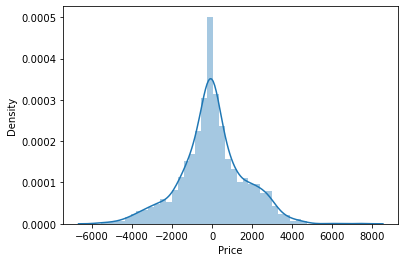

In [76]:
sns.distplot(y_test-predrf)
plt.show()

# Saving the model

### Importinf joblib

In [77]:
import joblib

### Save the model as a pickle in a file

In [78]:
joblib.dump(rf,'Flight_Fare_Prediction.pkl')

['Flight_Fare_Prediction.pkl']